Mfundo Monchwe

201726904

Assignment 2

**Implementation of Gradient descent optimization Algorithm**




# **Dictionary Learning Problem**
Dictionary Learning is a branch of signal processing and machine learning that aims at finding a frame (dictionary) in which some training data accepts a sparse representation. the sparese the representation, the better the dictionary.

 after reviewing articles and going each algorithms, decided to implement the *gradient descent optimization algorithm* to solve this issue of convex and non-convex problem.

To undestand how gradient descent works, we consider a multi-variable function $f(w)$ ,  where $\textbf{w}$ = [ 
$w_{1}$, $w_{2}$,...,
$w_{n}$ ]
$^{T}$.
to find the $\textbf{w}$ at which this function attains a minimum, gradient descent uses the following steps:


1.   Choose an initial random value of $\textbf{w}$
2.   Choose the number of maximum iteration  $_{T}$
3.   Choose a value for the $ learning$ $rate$ $\eta$  $ \epsilon [a,b] $
4.   Repeat the following steps until $f$ does not change or iterations exceed $_{T}$

a.   Compute  $\Delta$ $\textbf{w}$ = $-$ $\eta$ $\nabla_\textbf{w}$ $f(\textbf{w})$

b.   Update $\textbf{w}$ as: $\textbf{w}$ $\leftarrow$ $\textbf{w}$ + $\Delta$ $\textbf{w}$

The $\nabla_ \textbf{w} f$ denotes the gradient of  $\textbf{}f$ as given by:  

$\nabla_\textbf{w} f(\textbf{w}) =\begin{bmatrix} 
\frac{\partial f(\textbf{w})}{\partial w_1} \ 
\frac{\partial f(\textbf{w})}{\partial w_2} \ 
\vdots\ 
\frac{\partial f(\textbf{w})}{\partial w_n} 
\end{bmatrix}$

We can consider an example function of two variables $f(w_1,w_2)$ = $w_1^2+w_2^2$, then at each iteration $(w_1,w_2)$ is updates as:


$[w_1 w_2]$ $\leftarrow$ $[w_1  w_2]$ $-$ $\eta$ $[2w_1  2w_2]$





In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split

In [ ]:
def gradinet_descent(max_iter, threshold, w_init, obj_func, grad_func, extra_param =[],
                     learning_rate = 0.05, momentum=0.8):
  w = w_init
  w_history = w
  f_history = obj_func(w, extra_param)
  delta_w = np.zeros(w.shape)
  i = 0
  diff = 1.0e10

  while i<max_iter and diff>threshold:
    delta_w = -learning_rate*grad_func(w, extra_param) + momentum*delta_w
    w = w + delta_w

    #store the history of w and f
    w_history = np.vstack((w_history,w))
    f_history = np.vstack((f_history, obj_func(w, extra_param)))

    #update the iteration numbers and difference between successive values
    i+=1
    diff = np.absolute(f_history[-1]-f_history[-2])

  return w_history,f_history

# Optimizing Functions with Gradient Descent


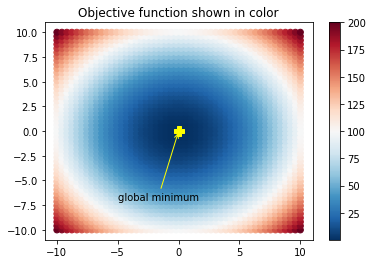

In [ ]:
def visualize_fw():
  x_cord = np.linspace(-10.0, 10.0, 50)
  y_cord = np.linspace(-10.0, 10.0, 50)
  w1,w2 = np.meshgrid(x_cord, y_cord)
  pts = np.vstack((w1.flatten(), w2.flatten()))

  #all 2D points on the grid
  pts = pts.transpose()

  #function values at each point
  f_vals = np.sum(pts*pts, axis = 1)
  function_plot(pts, f_vals)
  plt.title('Objective function shown in color')
  plt.show()
  return pts, f_vals



#Helper function to annotate a single point

def annotate_pt(text, xy, xytext, color):
  plt.plot(xy[0], xy[1], marker='P', markersize=10, c = color)
  plt.annotate(text, xy = xy, xytext = xytext,
               arrowprops = dict(arrowstyle ="->",
                                  color = color,
                                  connectionstyle = 'arc3'))
  
#plotting the function
#pts are 2D pts and f_val is corresp. function value
def function_plot(pts, f_val):
  f_plot = plt.scatter(pts[:,0], pts[:,1],
                       c= f_val, vmin = min(f_val), vmax = max(f_val),
                       cmap = 'RdBu_r')
  plt.colorbar(f_plot)
  #plot optimal point
  annotate_pt('global minimum', (0,0), (-5,-7), 'yellow')

pts, f_vals = visualize_fw()


# Running Gradient Descent with Different Hpyer-parameters

In [ ]:
#objective function
def f(w, extra=[]):
    return np.sum(w*w)

#function to compute the gradient
def grad(w, extra=[]):
    return 2*w

#function to plot the objective function
#and learning history annotated by arrows 
def visualize_learning(w_history):

  #make function plot
  function_plot(pts, f_vals)

  #plot history
  plt.plot(w_history[:,0], w_history[:,1], marker='o', c='magenta')

  #Annotate the point found at the last iteration
  annotate_pt('minimum found', (w_history[-1,0], w_history[-1,1]),
              (-1,7), 'green')
  iter = w_history.shape[0]
  for w,i in zip(w_history, range(iter-1)):
    #annotate witg arrows to show history
    plt.annotate("", xy=w, xycoords = 'data', xytext=w_history[i+1,:],
                 textcoords = 'data', arrowprops = dict(arrowstyle='<-',
                                                        connectionstyle = 'angle3'))

def solve_fw():
  #setting up
  rand = np.random.RandomState(19)
  w_init = rand.uniform(-10, 10, 2)
  fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18,14))
  learning_rates = [0.05, 0.2, 0.5, 0.8]
  momentum = [0,0.5,0.9]
  ind = 1

  #iteration through all possible parameter combinations
  for alpha in momentum:
    for eta,col in zip(learning_rates,[0,1,2,3]):
      plt.subplot(3,4, ind)
      w_history, f_history = gradinet_descent(5, -1, w_init, f, grad, [], eta, alpha)

      visualize_learning(w_history)
      ind = ind+1
      plt.text(-9, 12, 'Learning Rate = ' +str(eta), fontsize=13)
      if col==1:
        plt.text(10,15, 'momentum = ' +str(alpha), fontsize=20)

  fig.subplots_adjust(hspace=0.5, wspace=0.3)
  plt.show()


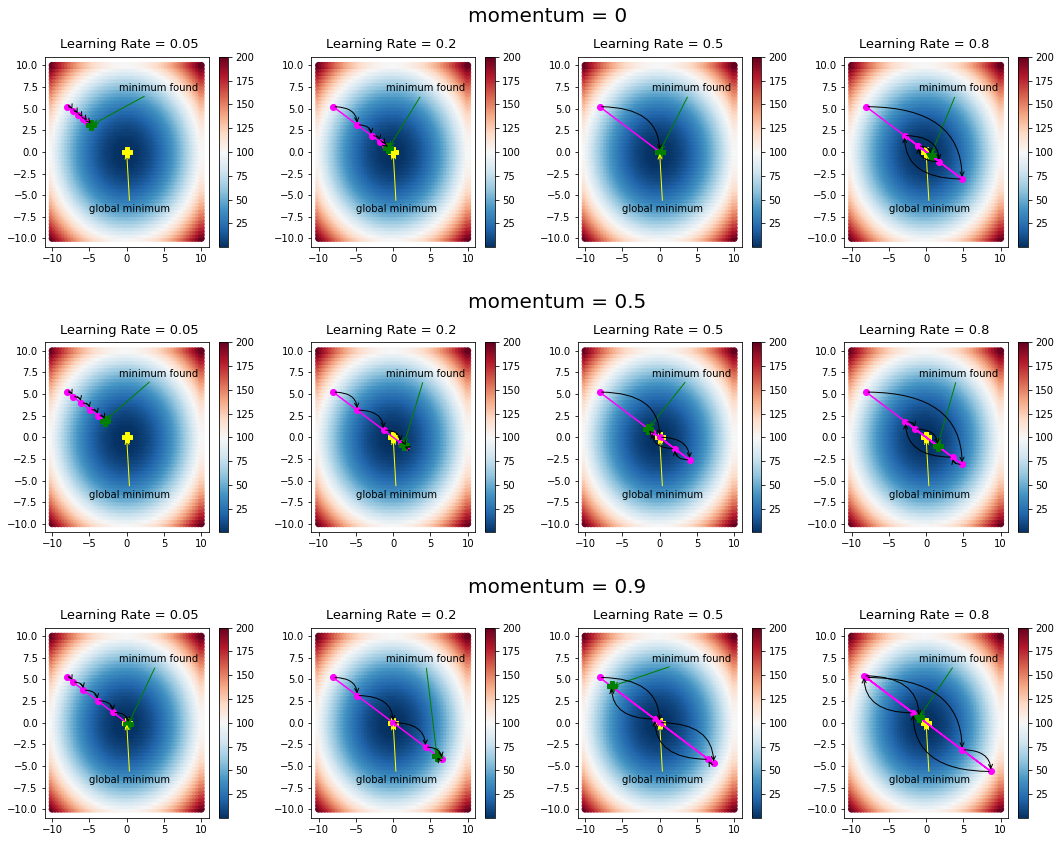

In [ ]:
solve_fw()